# 데이터 전처리

### 결측치 처리

In [1]:
import pandas as pd
import numpy as np

data = {
    'age': [25, 27, np.nan, 30, np.nan, 35],
    'income': [50000, 54000, 58000, np.nan, 61000, np.nan]
}

df = pd.DataFrame(data)
df

,age,income
0,25.0,50000.0
1,27.0,54000.0
2,NaN,58000.0
3,30.0,NaN
4,NaN,61000.0
5,35.0,NaN


In [2]:
df.isnull().sum()

age       2
income    2
dtype: int64

#### 결측치 제거

In [3]:
df.dropna()

,age,income
0,25.0,50000.0
1,27.0,54000.0


#### 사이킷 `SimpleImputer` 사용

In [ ]:
from sklearn.impute import SimpleImputer

print("📋 원본 데이터:\n", df)

# 2. 평균(mean)으로 결측치 대체
imputer = SimpleImputer(strategy='median') 
# median: 중앙값 (중앙값이 여러 개일 경우, 두 중앙값의 평균 값으로 처리)
# most_frequent: 최빈값(최빈이 여러 개일 경우 가장 작은 값으로 처리)
# constant: 디폴트값 (= df.fillna)

result = imputer.fit_transform(df[['age', 'income']]) # fit 은 학습하라는 의미, transform 은 적용하라는 의미
df[['age', 'income']] = result
print("\n✅ 결측치 처리 후:\n", df)

📋 원본 데이터:
     age   income
0  25.0  50000.0
1  27.0  54000.0
2   NaN  58000.0
3  30.0      NaN
4   NaN  61000.0
5  35.0      NaN

✅ 결측치 처리 후:
     age   income
0  25.0  50000.0
1  27.0  54000.0
2  28.5  58000.0
3  30.0  56000.0
4  28.5  61000.0
5  35.0  56000.0


In [5]:
# dataframe, numpy 데이터를 프린트했을때 형식을 변경할 수 있다
pd.set_option('display.float_format', '{:.0f}'.format)
np.set_printoptions(suppress=True)

print(result)
print(df)

[[   25.  50000. ]
 [   27.  54000. ]
 [   28.5 58000. ]
 [   30.  56000. ]
 [   28.5 61000. ]
 [   35.  56000. ]]
   age  income
0   25   50000
1   27   54000
2   28   58000
3   30   56000
4   28   61000
5   35   56000


## 이상치 처리

In [6]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [7]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8,41,7,1,322,3,38,-122
1,8,21,6,1,2401,2,38,-122
2,7,52,8,1,496,3,38,-122
3,6,52,6,1,558,3,38,-122
4,4,52,6,1,565,2,38,-122


In [8]:
df["target"] = housing.target # 중간 주택값
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8,41,7,1,322,3,38,-122,5
1,8,21,6,1,2401,2,38,-122,4
2,7,52,8,1,496,3,38,-122,4
3,6,52,6,1,558,3,38,-122,3
4,4,52,6,1,565,2,38,-122,3


- 데이터 타입 확인

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


- 통계 데이터 확인

In [10]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640,20640,20640,20640,20640,20640,20640,20640,20640
mean,4,29,5,1,1425,3,36,-120,2
std,2,13,2,0,1132,10,2,2,1
min,0,1,1,0,3,1,33,-124,0
25%,3,18,4,1,787,2,34,-122,1
50%,4,29,5,1,1166,3,34,-118,2
75%,5,37,6,1,1725,3,38,-118,3
max,15,52,142,34,35682,1243,42,-114,5


- 결측치 데이터 확인

In [11]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


def draw_boxplot(df, columns) :
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df[columns])
    plt.show()

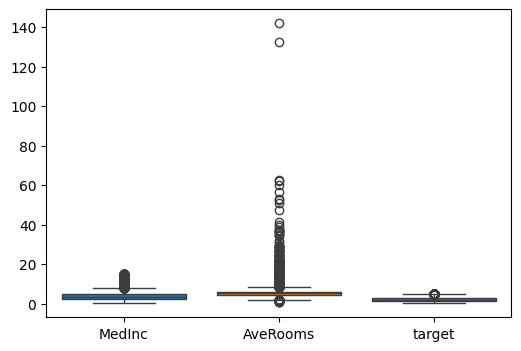

In [13]:
draw_boxplot(df, ['MedInc', 'AveRooms', 'target'])

In [14]:
def remove_iqr(df, columns):
    df_clean = df.copy()

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
        # df_clean = df_clean[~((df_clean['col'] < lower) | (df_clean['col'] > upper))]

    return df_clean

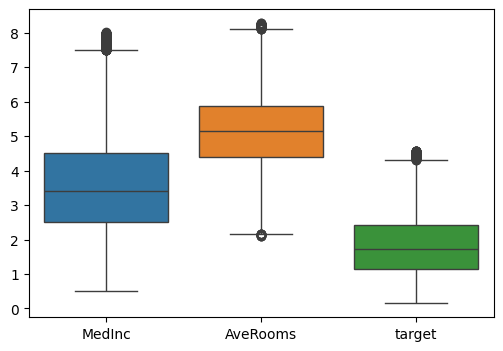

(18818, 9)

In [15]:
new_df = remove_iqr(df, ["MedInc", "AveRooms", "target"])
draw_boxplot(new_df, ['MedInc', 'AveRooms', 'target'])
new_df.shape

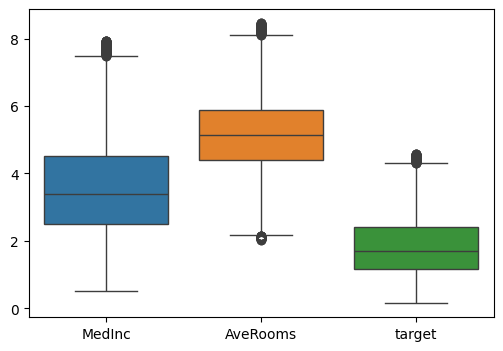

(18846, 9)

In [16]:
new_df_1 = remove_iqr(df, ["AveRooms", "MedInc", "target"])
draw_boxplot(new_df_1, ['MedInc', 'AveRooms', 'target'])
new_df_1.shape

In [17]:
def remove_iqr_same(df, columns):
    df_clean = df.copy()

    ranges = []
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        ranges.append((lower, upper))
    
    for index, col in enumerate(columns):
        lower, upper = ranges[index]
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
        # df_clean = df_clean[~((df_clean['col'] < lower) | (df_clean['col'] > upper))]

    return df_clean

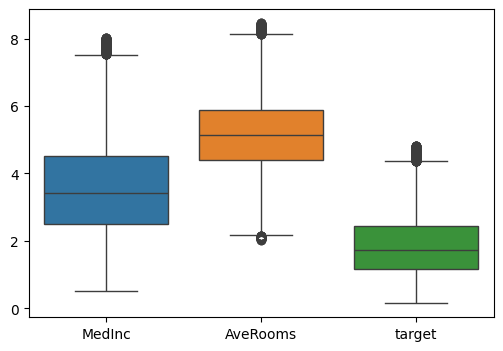

(18974, 9)

In [18]:
test_df = remove_iqr_same(df, ["MedInc", "AveRooms", "target"])
draw_boxplot(test_df, ['MedInc', 'AveRooms', 'target'])
test_df.shape

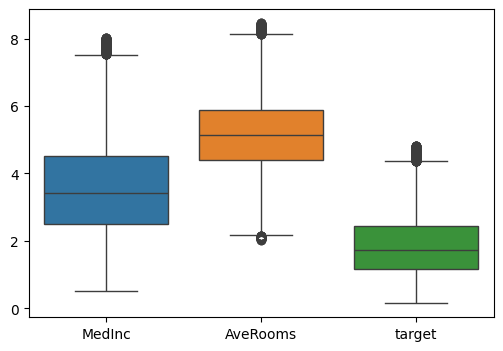

(18974, 9)

In [19]:
test_df = remove_iqr_same(df, ["AveRooms", "MedInc", "target"])
draw_boxplot(test_df, ['MedInc', 'AveRooms', 'target'])
test_df.shape

## 범주형 변수 인코딩

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = {
    'gender': ['male', 'female', 'female', 'male', 'female'],
    'grade': ['A', 'B', 'A', 'C', 'B']
}

df = pd.DataFrame(data)
df

,gender,grade
0,male,A
1,female,B
2,female,A
3,male,C
4,female,B


### 라벨 인코딩

In [21]:
le_gender = LabelEncoder()
le_grade = LabelEncoder()

df['gender_encoder'] = le_gender.fit_transform(df['gender'])
df['grade_encoder'] = le_grade.fit_transform(df['grade'])

df

,gender,grade,gender_encoder,grade_encoder
0,male,A,1,0
1,female,B,0,1
2,female,A,0,0
3,male,C,1,2
4,female,B,0,1


### 원-핫 인코딩

In [22]:
dummi_df = df.copy()
dummi_df = pd.get_dummies(dummi_df, columns=['gender'])
dummi_df = pd.get_dummies(dummi_df, columns=['grade'])
dummi_df

,gender_encoder,grade_encoder,gender_female,gender_male,grade_A,grade_B,grade_C
0,1,0,False,True,True,False,False
1,0,1,True,False,False,True,False
2,0,0,True,False,True,False,False
3,1,2,False,True,False,False,True
4,0,1,True,False,False,True,False


## 스케일링

특성 간 크기 차이 보정
- A, B 특성이 있을 때
- A가 더 결과값에 많은 영향을 주는 요소이지만
- B가 A보다 값이 크면 B가 모델의 결과값에 더 많은 영향을 주게 만들 수 있다

In [23]:
data = {
    'height': [150, 160, 165, 180, 155],
    'weight': [60, 65, 55, 90, 62]
}

df = pd.DataFrame(data)
df

,height,weight
0,150,60
1,160,65
2,165,55
3,180,90
4,155,62


⭐⭐⭐ Training set 을 기준으로 스케일러를 만들 것!
- training에서 만든 스케일러를 그대로 test에 적용해야함
- training 과 test 데이터 셋의 범주가 다르기 때문에, 전혀 다른 스케일러가 나온다




- 비슷한 맥락으로 데이터 전처리 과정에서 데이터가 변경이 되므로, 전후에 스케일러가 달라질 수 있다.
- 또한, 스케일링을 하면 데이터의 원형 값과 달라지므로 알아보기 어렵다.
- 따라서, 스케일링은 전처리 마지막 단계에 진행한다

In [24]:
pd.set_option('display.float_format', '{:.5f}'.format)
np.set_printoptions(suppress=True)

#### `StandardScaler`

In [25]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

df_std = pd.DataFrame(std_scaler.fit_transform(df), columns=['height_std', 'weight_std'])
df_std

,height_std,weight_std
0,-1.16554,-0.52284
1,-0.19426,-0.11437
2,0.29139,-0.93130
3,1.74831,1.92796
4,-0.67990,-0.35945


#### `MinMaxScaler`

In [26]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df), columns=['height_minmax', 'weight_minmax'])
df_minmax

,height_minmax,weight_minmax
0,0.00000,0.14286
1,0.33333,0.28571
2,0.50000,0.00000
3,1.00000,1.00000
4,0.16667,0.20000


## 데이터 분할 (Training/Test)

- X : 칼럼 데이터
- y : 정답 데이터

붓꽃 데이터를 사용하여 분류를 해보자
- 지도학습
- 분류 모델

In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [28]:
X = iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [29]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### `train_test_split`

⭐⭐⭐ 분류 모델을 데이터셋을 만들때는 정답 데이터(y)가 균일하게 들아가는 것이 좋다

1. 사전에 각 뷴류값 간의 데이터 수를 동일하게 맞추자

2. `stratify`옵션 추가 : train 과 test 간의 각 분류값들의 비율을 동일하게 맞춘다

3. 최후로는 다른 모델을 사용한다...
(⭐이때 동일한 데이터셋을 사용해야, 두 모델 중 더 성능이 좋은 모델을 확인할 수 있다) 
    > `random_state` 옵션으로 시드값을 넣어 동일한 데이터셋을 만들어 사용하자

In [30]:
from sklearn.model_selection import train_test_split
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(Counter(y_train))
print(Counter(y_test))

(120, 4)
(30, 4)
(120,)
(30,)
Counter({np.int64(0): 40, np.int64(2): 40, np.int64(1): 40})
Counter({np.int64(0): 10, np.int64(2): 10, np.int64(1): 10})


`dataFrame` 으로 하는 방법

In [31]:
import pandas as pd

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.10000,3.50000,1.40000,0.20000,0
1,4.90000,3.00000,1.40000,0.20000,0
2,4.70000,3.20000,1.30000,0.20000,0
3,4.60000,3.10000,1.50000,0.20000,0
4,5.00000,3.60000,1.40000,0.20000,0


In [32]:
X = df.drop('target', axis=1)
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(Counter(y_train))
print(Counter(y_test))

(105, 4)
(45, 4)
(105,)
(45,)
Counter({1: 35, 0: 35, 2: 35})
Counter({2: 15, 1: 15, 0: 15})


## 피처 엔지니어링(선택)

- 날짜 → 요일, 월
- 텍스트 → 길이, 단어 수
- 범주 + 수치 조합

## 교차검증 (Cross-Validation)

- 단순 train/test 분할은 결과가 **데이터 분할에 따라 크게 달라질 수 있음**
- 교차검증은 여러 번 테스트하여 **평균 성능을 계산**하므로 **일반화 성능**을 더 정확하게 추정할 수 있음

`RandomForestClassifier` 분류 모델 중 하나

### `cross_val_score`

In [33]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


X, y = load_iris(return_X_y=True)

model = RandomForestClassifier()

score = cross_val_score(model, X, y, cv = 5)
print(score)
print(score.mean())

[0.96666667 0.96666667 0.9        0.93333333 1.        ]
0.9533333333333334


### `StratifiedKFold` (분류 모델에 사용)

정답 데이터의 비율을 맞추는
statify 속성을 적용한 cross validation

In [34]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5)
model = RandomForestClassifier()

scroe = cross_val_score(model, X, y, cv=cv)
print(score)
print(score.mean())

[0.96666667 0.96666667 0.9        0.93333333 1.        ]
0.9533333333333334
